In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import prince

import gower

%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

<IPython.core.display.Javascript object>

In [3]:
happy = pd.read_csv("data/2019.csv")
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<IPython.core.display.Javascript object>

In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<IPython.core.display.Javascript object>

There appear to be a few strong correlations between the survey questions and the overall score, but not all. 

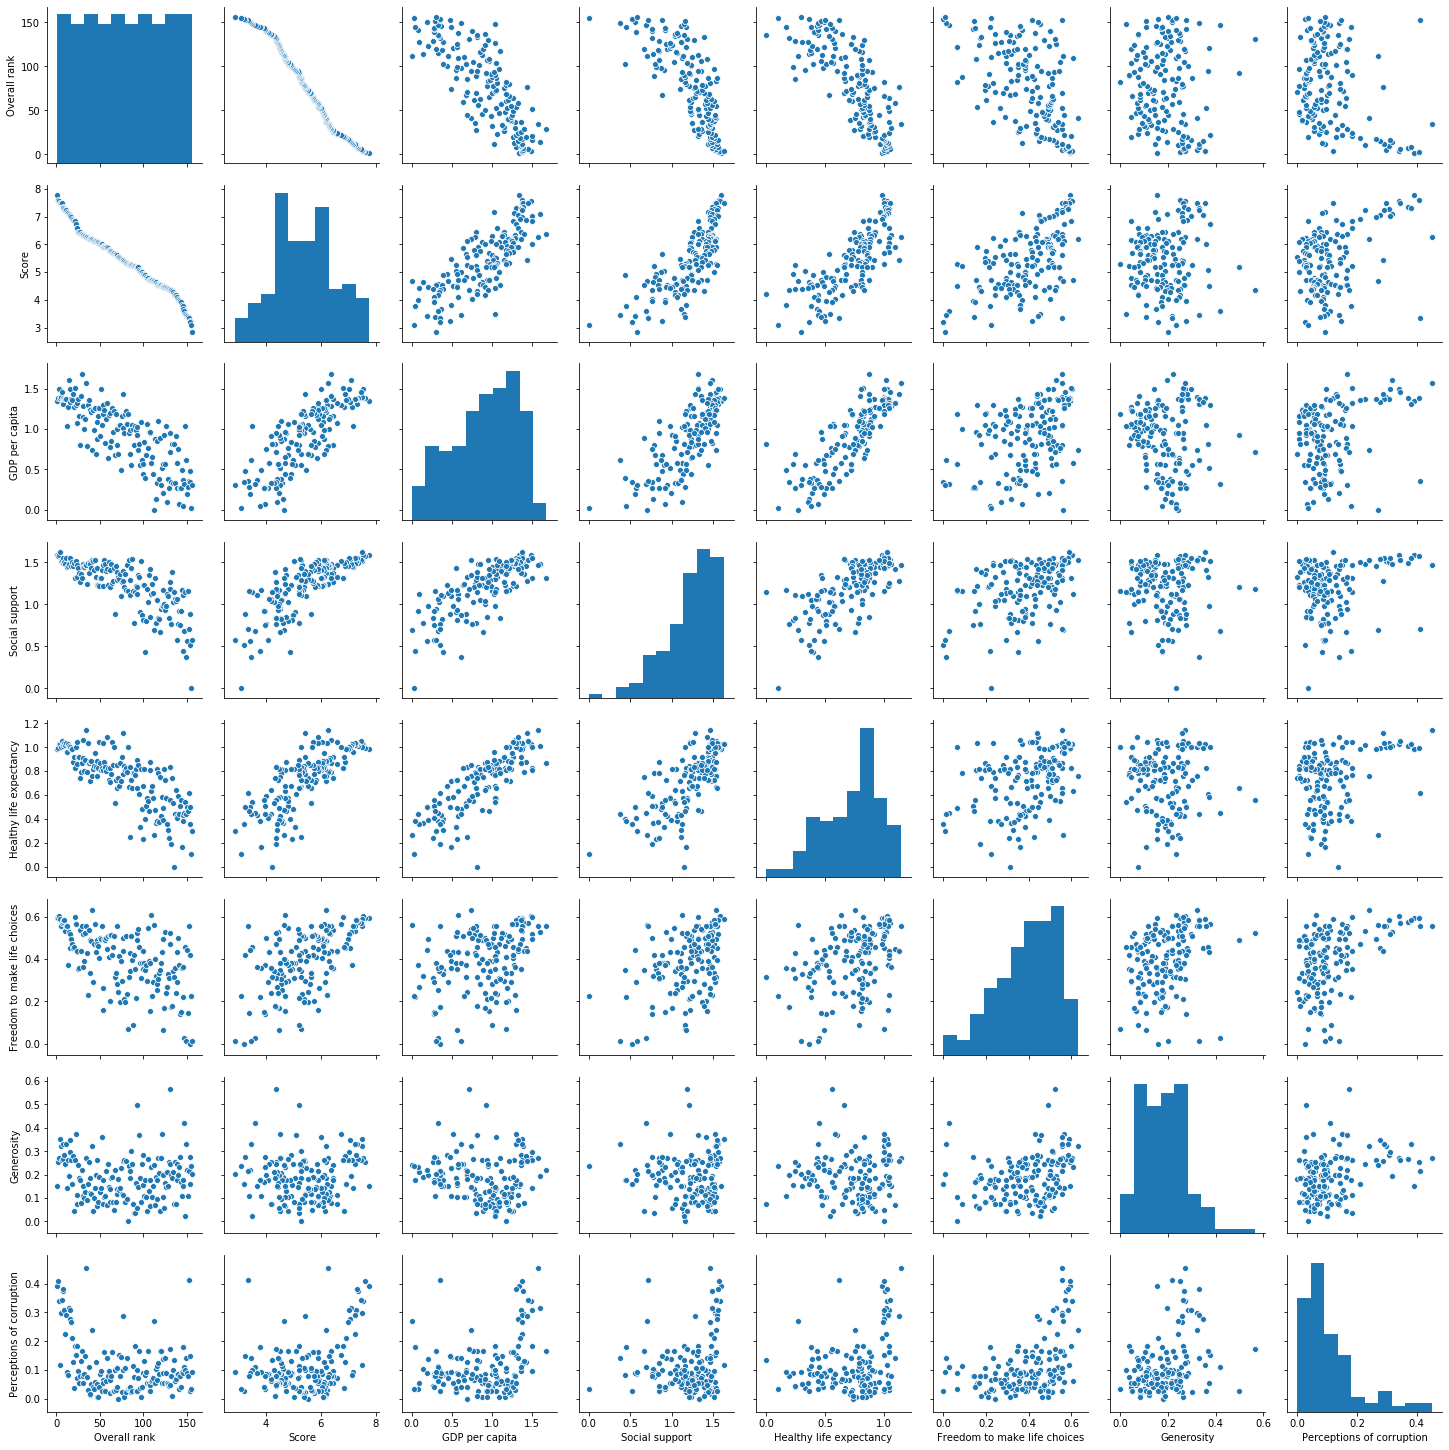

<IPython.core.display.Javascript object>

In [5]:
sns.pairplot(happy)

In [6]:
environ = pd.read_csv("data/World_countries_env_vars.csv")
drop_cols = ["aspect", "slope", "wind"]
missingy_cols = environ[environ.isna().mean(axis=1) > 0.2].index
environ = environ.drop(labels=missingy_cols)



,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,52.450745,434.729235,49.685742,181.575443,69.307804,184.997820,50.631191,-24.743686,9.922328,-19.847401,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,3.013606,210.990816
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,100.500560,671.911733,43.415171,198.817687,93.486073,249.429018,39.053796,-5.388305,12.751939,1.420303,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,3.586282,180.274639
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,66.220983,453.318423,46.837965,161.861002,64.995707,177.361250,45.963724,-23.193780,9.232454,-19.120410,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,3.378886,231.498702
3,Antarctica,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.807829
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,449.847542,2728.355157,29.436566,677.470571,326.216210,904.111711,10.004346,24.396248,8.508100,24.827528,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,1.366648,293.095107


<IPython.core.display.Javascript object>